In [1]:
import numpy
import scipy.special
import matplotlib.pyplot as plt
from tkinter import _flatten
from itertools import chain
import imageio
import scipy.misc
from scipy.ndimage import uniform_filter


In [2]:
    #Block of initialization
    class neuralNetwork :
        def __init__(self, inputNodes, hiddenNodes, outputNodes, learningRate):
    # set number of nodes in each input, hidden,output layer
             self.iNodes=inputNodes
             self.hNodes=hiddenNodes
             self.oNodes=outputNodes
     #learning rate
             self.lr=learningRate
    #set up weight matrix which meet the require of Gaussian distribution
    #function(argument1,argument2,argument3)
    #argument1 refers to means of Gaussian distribution 
    #argument2 refers to standar deviation
    #argument3 refers to dim of matrix 
    #weight input to hidden layer
             self.Wih=numpy.random.normal(0.0,pow(self.hNodes,-0.5),(self.hNodes,self.iNodes))
    #weight hidden to output layer
             self.b1=numpy.random.normal(0.0,pow(self.hNodes,-0.5),(self.hNodes,1))
             self.b2=numpy.random.normal(0.0,pow(self.oNodes,-0.5),(self.oNodes,1))
             self.Who=numpy.random.normal(0.0,pow(self.oNodes,-0.5),(self.oNodes,self.hNodes))

    #Activation function sigmoid()
             self.activation_function= lambda x: scipy.special.expit(x)
    #Block of training
        def train(self, input_list, targets_list):
            #transform list to array
            inputs=numpy.array(input_list,ndmin=2).T
            targets=numpy.array(targets_list,ndmin=2).T
            #input of layer hidden refers to O=Wih·I
            hidden_inputs = numpy.dot(self.Wih,inputs)+self.b1
            #via activation function 
            hidden_outputs=self.activation_function(hidden_inputs)
            #input of layer output refers to O=Wh0·hiddenl_output
            final_inputs = numpy.dot(self.Who,hidden_outputs)+self.b2
            #via activation function 
            final_outputs=self.activation_function(final_inputs)
            #define whole error
            output_errors=targets-final_outputs
            #divide whole error into different part and distribute it depending on weight
            hidden_errors= numpy.dot(self.Who.T,output_errors)
            #renew weight matrix layer hidden to output by caculating degradient
            self.Who+=self.lr*numpy.dot(output_errors*final_outputs*(1.0-final_outputs),numpy.transpose(hidden_outputs))
            self.b2+=self.lr*(output_errors*final_outputs*(1.0-final_outputs))
           #renew weight matrix layer input to hidden by caculating degradient
            self.b1+=self.lr*hidden_errors*hidden_outputs*(1.0-hidden_outputs)
            self.Wih+=self.lr*numpy.dot(hidden_errors*hidden_outputs*(1.0-hidden_outputs),numpy.transpose(inputs))
            #self.Who+=self.lr*numpy.dot(output_errors*final_outputs*(1.0-final_outputs)*(targets*final_outputs-targets*final_outputs*final_outputs-1.0+targets)/(1.0-final_outputs),numpy.transpose(hidden_outputs))
            #self.Wih+=self.lr*numpy.dot(hidden_errors*hidden_outputs*(1.0-hidden_outputs)*(targets*hidden_outputs-targets*hidden_outputs*hidden_outputs-1.0+targets)/(1.0-hidden_outputs),numpy.transpose(inputs))
            #(targets*final_outputs-targets*final_outputs*final_outputs-1.0+targets)/(1.0-final_outputs)*
        
    #Block of query() 
    #refers to this block accepts the input of NN and gives feedback 
        def query(self,input_list):
    #ndmin refers to min dim=2
    #T refers to transpose
            inputs=numpy.array(input_list,ndmin=2).T
    # Wih·I=X1
            hidden_inputs=numpy.dot(self.Wih,inputs)+self.b1
    #hidden_output=sigmoid(X1)=sigmoid(Wih·I)
            hidden_outputs=self.activation_function(hidden_inputs)
    #Who·O=X2
            final_input=numpy.dot(self.Who,hidden_outputs)+self.b2
    #final_output=sigmoid(X2)=sigmoid(Who·X2)
            final_outputs=self.activation_function(final_input)
            return (final_outputs)
        def giveBackLoss(self, input_list, targets_list):
            inputs=numpy.array(input_list,ndmin=2).T
            targets=numpy.array(targets_list,ndmin=2).T
            hidden_inputs = numpy.dot(self.Wih,inputs)+self.b1
            hidden_outputs=self.activation_function(hidden_inputs)
            final_inputs = numpy.dot(self.Who,hidden_outputs)+self.b2
            final_outputs=self.activation_function(final_inputs)
            output_errors=pow(targets-final_outputs,2)/2.0
            print(sum(output_errors))

In [3]:
#input data of nodes
input_nodes=784
hidden_nodes=500
output_nodes=10
# set learning rate 
learning_rate = 0.1
#create instance of NN(neural network)
# read the training dataset
training_data_file = open('C:/Users/32665/Desktop/transform_training/new/new_training_data.csv','r')
training_data_list=training_data_file.readlines()
training_data_file.close()


This block is excuted to train the model by using MNIST dataset

In [4]:
# initial the model
n=neuralNetwork(input_nodes,hidden_nodes,output_nodes,learning_rate)
# set epochs
epochs=5
flow=0
for i in range(epochs):
    for record in training_data_list:
        all_values=record.split(',')
        all_values=numpy.asfarray(all_values)
        inputs=numpy.asfarray(all_values[1:])/255.0*0.99+0.01
        #inputs=numpy.asfarray(all_values[1:])
        #image=inputs.reshape(28,28)
        #ret, binary = cv2.threshold(image,0,255,cv2.THRESH_BINARY)
        #inputs=binary/255.0*0.99+0.01
        inputs=inputs.reshape(784)
        targets=numpy.zeros(output_nodes)+0.01
        targets[int(all_values[0])]=0.99
        n.train(inputs,targets)
        flow+=1
        if flow%5000==0:
            n.giveBackLoss(inputs,targets)
        #inputs_plusx_img = scipy.ndimage.interpolation.rotate(inputs.reshape(28,28), 10, cval=0.01, order=1, reshape=False)
        #n.train(inputs_plusx_img.reshape(784), targets)
        #inputs_minusx_img = scipy.ndimage.interpolation.rotate(inputs.reshape(28,28), -10, cval=0.01, order=1, reshape=False)
        #n.train(inputs_minusx_img.reshape(784), targets)

        #rotate sample set 10 degree
        #scaled_input=inputs
       # input_plus10_img=scipy.ndimage.interpolation.rotate(scaled_input.reshape(28,28),10,cval=0.01,reshape=False)
        #input_plus10=input_minus10_img.reshape(784)
       # input_minus10_img=scipy.ndimage.interpolation.rotate(scaled_input.reshape(28,28),-10,cval=0.01,reshape=False)  
        #input_minus10=input_minus10_img.reshape(784)
     
        #n.train(input_minus10,targets)
      #  n.train(input_plus10,targets)

This block is excuted to train the model by using MNIST dataset but rotate the picture to improve the robustness

In [19]:
epochs=5
flow=0
for i in range(epochs):
    for record in training_data_list:
        all_values=record.split(',')
        all_values=numpy.asfarray(all_values)
        inputs=numpy.asfarray(all_values[1:])/255.0*0.99+0.01
        #inputs=numpy.asfarray(all_values[1:])
        #image=inputs.reshape(28,28)
        #ret, binary = cv2.threshold(image,0,255,cv2.THRESH_BINARY)
        #inputs=binary/255.0*0.99+0.01
        inputs=inputs.reshape(784)
        targets=numpy.zeros(output_nodes)+0.01
        targets[int(all_values[0])]=0.99
        scaled_input=inputs
        input_plus10_img=scipy.ndimage.interpolation.rotate(scaled_input.reshape(28,28),10,cval=0.01,reshape=False)
        input_plus10=input_plus10_img.reshape(784)
        input_minus10_img=scipy.ndimage.interpolation.rotate(scaled_input.reshape(28,28),-10,cval=0.01,reshape=False)  
        input_minus10=input_minus10_img.reshape(784)
        n.train(inputs,targets)
        n.train(input_minus10,targets)
        n.train(input_plus10,targets)
        flow+=1
        if flow%5000==0:
            n.giveBackLoss(inputs,targets)

[0.00027003]
[0.00055002]
[0.00029293]
[0.0006109]
[0.00015106]
[0.00203016]
[0.00046656]
[0.00039195]
[0.00038519]
[0.00012914]
[0.00010773]
[0.00023995]
[0.00049428]
[0.00061416]
[0.00024016]
[0.00094184]
[0.00011954]
[0.00197083]
[0.00052913]
[0.00111278]
[0.00041045]
[0.00034009]
[0.00011855]
[0.00015969]
[0.00039694]
[0.00026246]
[0.00027826]
[0.0011225]
[0.00014863]
[0.00146678]
[0.00036588]
[0.00156258]
[0.00040201]
[0.00012898]
[0.0002128]
[0.00011843]
[0.00039945]
[0.00018488]
[0.00028525]
[0.00123383]
[0.00015453]
[0.00136665]
[0.00031522]
[0.00066142]
[0.00041389]
[0.00011303]
[0.00010666]
[0.00014011]
[0.0002935]
[0.00018029]
[0.00026197]
[0.00101321]
[0.0001356]
[0.00065247]
[0.00012812]
[0.00070255]
[0.00042518]
[7.58453762e-05]
[0.00012313]
[0.00011565]


In [19]:
epochs=5
flow=0
for i in range(epochs):
    for record in training_data_list:
        all_values=record.split(',')
        all_values=numpy.asfarray(all_values)
        inputs=numpy.asfarray(all_values[1:])/255.0*0.99+0.01
        #inputs=numpy.asfarray(all_values[1:])
        #image=inputs.reshape(28,28)
        #ret, binary = cv2.threshold(image,0,255,cv2.THRESH_BINARY)
        #inputs=binary/255.0*0.99+0.01
        inputs=inputs.reshape(784)
        targets=numpy.zeros(output_nodes)+0.01
        targets[int(all_values[0])]=0.99
        scaled_input=inputs
        input_plus10_img=scipy.ndimage.interpolation.rotate(scaled_input.reshape(28,28),10,cval=0.01,reshape=False)
        input_plus10=input_plus10_img.reshape(784)
        input_minus10_img=scipy.ndimage.interpolation.rotate(scaled_input.reshape(28,28),-10,cval=0.01,reshape=False)  
        input_minus10=input_minus10_img.reshape(784)
        n.train(inputs,targets)
        n.train(input_minus10,targets)
        n.train(input_plus10,targets)
        flow+=1
        if flow%5000==0:
            n.giveBackLoss(inputs,targets)

[0.00027003]
[0.00055002]
[0.00029293]
[0.0006109]
[0.00015106]
[0.00203016]
[0.00046656]
[0.00039195]
[0.00038519]
[0.00012914]
[0.00010773]
[0.00023995]
[0.00049428]
[0.00061416]
[0.00024016]
[0.00094184]
[0.00011954]
[0.00197083]
[0.00052913]
[0.00111278]
[0.00041045]
[0.00034009]
[0.00011855]
[0.00015969]
[0.00039694]
[0.00026246]
[0.00027826]
[0.0011225]
[0.00014863]
[0.00146678]
[0.00036588]
[0.00156258]
[0.00040201]
[0.00012898]
[0.0002128]
[0.00011843]
[0.00039945]
[0.00018488]
[0.00028525]
[0.00123383]
[0.00015453]
[0.00136665]
[0.00031522]
[0.00066142]
[0.00041389]
[0.00011303]
[0.00010666]
[0.00014011]
[0.0002935]
[0.00018029]
[0.00026197]
[0.00101321]
[0.0001356]
[0.00065247]
[0.00012812]
[0.00070255]
[0.00042518]
[7.58453762e-05]
[0.00012313]
[0.00011565]


In [5]:
# read the test data
test_data_file=open('C:/Users/32665/Desktop/transform_training/new/test/new_test_data.csv','r')
test_data_list=test_data_file.readlines()
test_data_file.close()


"\nfor record in test_data_list:\n    test_values=record.split(',')\n    #transpose string to float\n    #test_values=numpy.asfarray(test_values[1:]).reshape(784)/255.0*0.99+0.01\n        test_values=numpy.asfarray(test_values[1:])\n        image=test_values.reshape(28,28)\n        ret, binary = cv2.threshold(image,127,255,cv2.THRESH_BINARY)\n        inputs=binary/255.0*0.99+0.01\n        inputs=inputs.reshape(784)\n"

In [10]:
#set up a list named scoreCard to caculate time successfully recognized 
scoreCard=[]
pic_false=[]
label_false=[]
false_number=[0,0,0,0,0,0,0,0,0,0]
for record in test_data_list:
    all_values=record.split(',')
    #get lable of number
    correct_label=int(all_values[0])
    #print(correct_label,"correct label")
    inputs=(numpy.asfarray(all_values[1:])/255.0*0.99)+0.01
    outputs=n.query(inputs)
    #send back to max number's index 
    label=numpy.argmax(outputs)
    #print(label,'networks answer')
    if(label==correct_label):
        scoreCard.append(1)
    else:
        scoreCard.append(0)
        false_number[correct_label]+=1
        pic_false.append(inputs)
        label_false.append(correct_label)
        #cv2.imshow('',binary)
        #cv2.waitKey(0)
        pass
    pass
    

print the false number

In [7]:
for i in false_number:
    print(str(false_number.index(i))+":"+str(i))
    

0:0
0:0
2:3
3:9
4:2
5:7
6:6
7:1
7:1
3:9


In [24]:
#save finished weight matrix
numpy.savetxt('C:/Users/32665/Desktop/Who_new_sigb_rotate__97.8%.csv', n.Who, fmt='%f', delimiter = ',')
numpy.savetxt('C:/Users/32665/Desktop/Wih_new_sigb_rotate_97.8%.csv', n.Wih, fmt='%f', delimiter = ',')


In [7]:
numpy.savetxt('C:/Users/32665/Desktop/b1_new_sigb_rotate__97.7%.csv', n.b1, fmt='%f', delimiter = ',')
numpy.savetxt('C:/Users/32665/Desktop/b2_new_sigb_rotate_97.7%.csv', n.b2, fmt='%f', delimiter = ',')

NameError: name 'n' is not defined

This block is used to visulize the false sample

In [17]:
import matplotlib.pyplot as plt
def print_number_pic(label,matrix):
    counter=0
    fig, ax = plt.subplots(nrows=2, ncols=19, sharex='all', sharey='all')
    ax = ax.flatten()
    for i in range(len(label)):
        img= matrix[i].reshape(28, 28)
        #ax[i].set_title(label[i])
        ax[i].imshow(img, cmap='Greys', interpolation='nearest')
        counter+=1
        if counter%10:
            print(counter)
    ax[0].set_xticks([])
    ax[0].set_yticks([])
    plt. figure(figsize=(5,8))
    plt.tight_layout()
    plt.show()

1
2
3
4
5
6
7
8
9
11
12
13
14
15
16
17
18
19
21
22
23
24
25
26
27
28
29
31
32
33
34
35
36
37
38


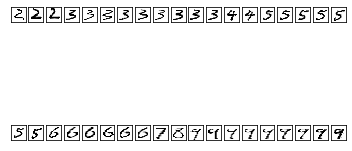

<Figure size 360x576 with 0 Axes>

In [18]:
print_number_pic(label_false,pic_false)